![107年國中會考非選第二題](./107年國中會考非選第二題.jpg)
![107年國中會考非選第二題-solve](./107年國中會考非選第二題-solve.jpg)

當前工作目錄 ==> /home/jovyan/short-path
the python version is 3.7.10


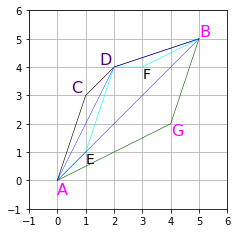

In [1]:
# 107年會考非選第二題
# (home)/short-path/
# shortest-path
# 2021-10-08
#
# python 3.8.10
# run on replit.com
# run on mybinder.org
#
# python 3.9.1
# run on miniconda 3 JupyterLab
#
# 要執行本程式, 請按上方run▶
#
# to fix matplotlib warning
import os
path = os.getcwd()
print('當前工作目錄 ==>', path)
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
#
from platform import python_version
print('the python version is', python_version())
#
import numpy as np
# 載入繪圖模組 pyplot, 重新命名為 plot
import matplotlib.pyplot as plt
#
from shapely import affinity
from shapely.geometry  import LineString, Point
#
# ---------------------------------------------
#
def set_graphic_area(width,height) :
        
    cm2inch = 1/2.54    # inch per cm
    #
    # define graphic area
    #
    left_margin = 1.0   # cm
    right_margin = 1.0  # cm
    #
    figure_width  = width  # cm , from xmin to xmax
    figure_height = height # cm , from ymin to ymax
    #
    top_margin = 1.0    # cm
    bottom_margin = 1.0 # cm
    #
    box_width = left_margin + figure_width + right_margin   # cm
    box_height = top_margin + figure_height + bottom_margin # cm
    #
    top_value    = 1.0 - top_margin / box_height
    bottom_value = bottom_margin / box_height
    left_value   = left_margin / box_width
    right_value  = 1.0 - right_margin / box_width
    #
    return (box_width*cm2inch,box_height*cm2inch,top_value,bottom_value,left_value,right_value,width)
#
# end of def
#
def shapely_Arc(cxy, r, start_angle, end_angle) :

    numsegments = 720
    # The coordinates of the arc
    theta = np.radians(np.linspace(start_angle, end_angle, numsegments))
    x = cxy[0] + r * np.cos(theta)
    y = cxy[1] + r * np.sin(theta)
    Arc = LineString(np.column_stack([x, y]))
    return Arc
#
# end of def
#
def motif_line(LS, MYcolor, ZORDER, LINEWIDTH) :
    #
    xs, ys = LS.xy
    ax.plot(xs, ys, color=MYcolor, alpha=1.0, linewidth=LINEWIDTH, solid_capstyle='round', zorder=ZORDER)
    return
#
def motif_fill(LS, color, ZORDER, Alpha) :
    #
    xs, ys = LS.xy
    ax.fill(xs, ys, alpha=Alpha, closed=True, edgecolor=None, facecolor=color, fill=True, zorder=ZORDER)
    return
#
# ------------------------------------------------------------------------------------------------
#
# tup7 is type of Tuple, have 7 indexed value
#
tup7 = set_graphic_area(7, 7)  
fig = plt.figure(figsize=(tup7[0], tup7[1])) # 呼叫 pyplot.figure(), 建立一個圖表物件, 並成為目前圖表物件
ax = fig.add_subplot(1,1,1)   # 圖表的繪圖區域被分為1個子圖, 1 row, 1 column, plot to index 1
fig.subplots_adjust(
                top    = tup7[2] ,
                bottom = tup7[3] ,
                left   = tup7[4] ,
                right  = tup7[5] ,
                )
#
plt.xlim(-1, 6)    # 設定X軸的顯示範圍, from xmin to xmax
plt.ylim(-1, 6)    # 設定Y軸的顯示範圍, from ymin to ymax
#
xvalues = [-1,0,1,2,3,4,5,6]
yvalues = [-1,0,1,2,3,4,5,6]
plt.xticks(xvalues)
plt.yticks(yvalues)
plt.tick_params(labelsize=10)
#
plt.grid(True)
ax.set_axis_on()    # will turn on  grid line
# ax.set_axis_off() # will turn off grid line
#
# get current axes, set X,Y same ratio & scale  
plt.gca().set_aspect('equal', adjustable='box')
#
pA = (0,0)
pB = (5,5)
pC = (1,3)
pD = (2,4)
pE = (1,1)
pF = (3,4)
pG = (4,2)
#
line_AB    = LineString([pA, pB])
line_ACDB  = LineString([pA, pC, pD, pB])
line_AEDFB = LineString([pA, pE, pD, pF, pB])
line_AGB   = LineString([pA, pG, pB])
line_ADB   = LineString([pA, pD, pB])
#
motif_line(line_AB,    'blue',      20, 0.4) 
motif_line(line_ACDB,  'black',     10, 0.6) 
motif_line(line_AEDFB, 'cyan',      10, 0.6) 
motif_line(line_AGB,   'darkgreen', 10, 0.6) 
motif_line(line_ADB,   'blue',      20, 0.4) 
#
plt.savefig("./png/path-1.png",format="png",dpi=150, facecolor='white')
#
ax.text(0.0, -0.5, 'A', fontsize=16, color='magenta', alpha=1.0)
ax.text(5.0, 5.1, 'B', fontsize=16, color='magenta', alpha=1.0)
ax.text(0.5, 3.1, 'C', fontsize=16, color='indigo', alpha=1.0)
ax.text(1.5, 4.1, 'D', fontsize=16, color='indigo', alpha=1.0)
ax.text(1.0, 0.6, 'E', fontsize=14, color='black', alpha=1.0)
ax.text(3.0, 3.6, 'F', fontsize=14, color='black', alpha=1.0)
ax.text(4.0, 1.6, 'G', fontsize=16, color='magenta', alpha=1.0)
#
plt.savefig("./png/path-2.png",format="png",dpi=150, facecolor='white')
#